## Take Home 2: Spanish Translation A/B Test

## Goal 1: Go through typical A/B test analysis steps, analyze results
## Goal 2: Design an algorithm to automate some steps

In [1]:
## Data sets

# /Users/huangz36/Documents/DS_Challenges/Translation_Test/test_table.csv
# /Users/huangz36/Documents/DS_Challenges/Translation_Test/user_table.csv

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import t
import statsmodels.api as sm
import statsmodels.stats.power as smp

import matplotlib.pyplot as plt
import seaborn as sns

/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Background
#### Spain-based users have much higher conversion rate
#### Translation test: each country have its one translation written by a local
#### A/B test result is negative, non-localized translation doing better

### Tasks
#### 1. Confirm the test is actually negative (old version performs better)
#### 2. Explain why this happend, localized translation really worse?
#### 3. Design algorithm to return FALSE if the same probelm happening

In [3]:
test_table = "/Users/huangz36/Documents/DS_Challenges/Translation_Test/test_table.csv"
user_table = "/Users/huangz36/Documents/DS_Challenges/Translation_Test/user_table.csv"

df_test = pd.read_csv(test_table, sep=",", header=0)
df_user = pd.read_csv(user_table, sep=",", header=0)

In [4]:
df_test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [5]:
df_test.shape

(453321, 9)

In [6]:
df_test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [7]:
#### Is the result date related? In certain time period, conversion rate is higher? When is experiment performed?
#### Source, device, ad_channle, browser have something to do with conversion rate?
#### date has 5 unique values ['2015-12-03', '2015-12-04', '2015-11-30', '2015-12-01','2015-12-02'], mostly from "2015-12-04" 
#### Language has ES, EN and Other, need to filter fro "ES" only

In [8]:
22475 / 430846
#### Conversion rate is 0.0522
#### Control / Treatment roughly same

0.05216481062839158

In [9]:
df_test.date.unique()

array(['2015-12-03', '2015-12-04', '2015-11-30', '2015-12-01',
       '2015-12-02'], dtype=object)

In [10]:
for col in df_test.columns:
    print("col", col)
    print(df_test[col].value_counts())

col user_id
315281    1
281192    1
829380    1
837823    1
631688    1
         ..
167264    1
583198    1
662755    1
642244    1
241662    1
Name: user_id, Length: 453321, dtype: int64
col date
2015-12-04    141163
2015-12-03     99493
2015-11-30     71025
2015-12-01     70991
2015-12-02     70649
Name: date, dtype: int64
col source
Ads       181877
SEO       180610
Direct     90834
Name: source, dtype: int64
col device
Web       251565
Mobile    201756
Name: device, dtype: int64
col browser_language
ES       377547
EN        63137
Other     12637
Name: browser_language, dtype: int64
col ads_channel
Facebook    68425
Google      68180
Yahoo       27435
Bing        13689
Other        4148
Name: ads_channel, dtype: int64
col browser
Android_App    155135
Chrome         101929
IE              61715
Iphone_App      46621
Safari          41065
FireFox         40766
Opera            6090
Name: browser, dtype: int64
col conversion
0    430846
1     22475
Name: conversion, dtype: int64
col 

In [11]:
df_user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [12]:
df_user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


### Note: to limit the A/B test result to users with browser_language as ES and exclude spain

In [13]:
for col in df_user.columns:
    print("col", col)
    print(df_user[col].value_counts())

col user_id
765821    1
185140    1
125374    1
995789    1
160374    1
         ..
131578    1
660609    1
323863    1
125665    1
314649    1
Name: user_id, Length: 452867, dtype: int64
col sex
M    264485
F    188382
Name: sex, dtype: int64
col age
21    27601
22    27287
23    27064
20    27046
24    26805
19    26714
25    26091
18    25907
26    24975
27    23717
28    22134
29    20712
30    19319
31    17680
32    16109
33    14211
34    12630
35    11236
36     9603
37     8172
38     7214
39     5816
40     4984
41     4129
42     3376
43     2687
44     2155
45     1760
46     1388
47     1057
48      860
49      637
50      494
51      358
52      267
53      229
54      130
55      109
56       58
57       51
58       30
60       21
59       14
61       11
63        6
62        5
65        2
64        2
70        1
68        1
67        1
66        1
Name: age, dtype: int64
col country
Mexico         128484
Colombia        54060
Spain           51782
Argentina       46733


## STEP1 : merge the two tables

In [16]:
df = df_test.merge(df_user, on='user_id', how='left')

print("df_test.shape", df_test.shape, "df_user", df_user.shape)

df_test.shape (453321, 9) df_user (452867, 4)


In [17]:
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [26]:
df_conversion_rate_by_country_and_test = \
df.groupby(['country', 'test'])['conversion'].agg(['sum','count']).reset_index()
df_conversion_rate_by_country_and_test.columns = ['country', 'test', 'conversion', 'total']
df_conversion_rate_by_country_and_test['conversion_rate'] = \
df_conversion_rate_by_country_and_test['conversion'] / df_conversion_rate_by_country_and_test['total']

In [27]:
df_conversion_rate_by_country_and_test.head()

,country,test,conversion,total,conversion_rate
0,Argentina,0,141,9356,0.015071
1,Argentina,1,513,37377,0.013725
2,Bolivia,0,274,5550,0.049369
3,Bolivia,1,267,5574,0.047901
4,Chile,0,474,9853,0.048107


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

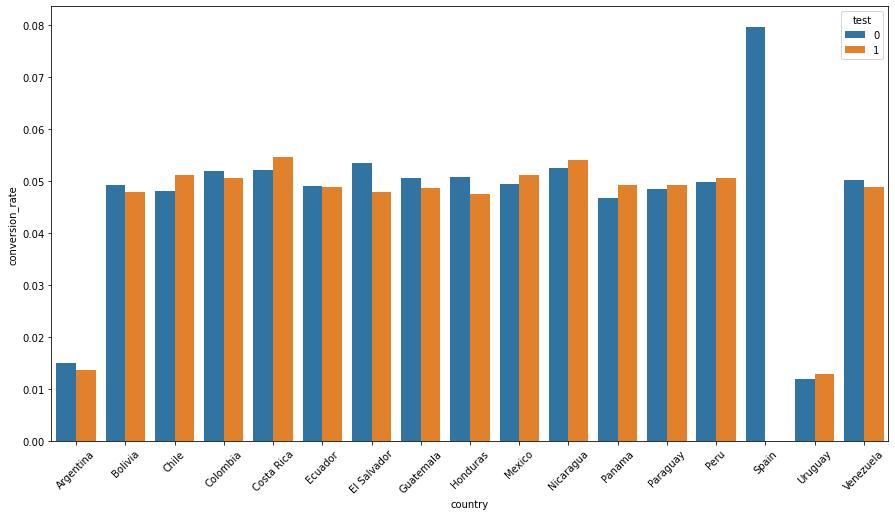

In [39]:
plt.figure(figsize=(15,8))
plot = sns.barplot(x = 'country', y = 'conversion_rate', \
                   data=df_conversion_rate_by_country_and_test, hue='test')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

#### Conversion rate is very country specific
#### Need to check if the split for some segment of users more likely to end up in test or in control 

In [50]:
df.isnull().values.any()

True

In [51]:
df.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

In [57]:
df = df[df['country']!='nan']
print("country", "treatment_proportion", "control_proportion")
for country in df['country'].unique():
    total_count = df[df['country']==country].shape[0]
    if total_count != 0:
        tmt_count = df[(df['country']==country) & (df['test']==1)].shape[0]
        ctl_count = df[(df['country']==country) & (df['test']==0)].shape[0]
        tmt_ratio = round(tmt_count/total_count, 5)
        ctl_ratio = round(ctl_count/total_count, 5)
        print(country, tmt_ratio, ctl_ratio)

country treatment_proportion control_proportion
Spain 0.0 1.0
Mexico 0.50026 0.49974
Venezuela 0.49619 0.50381
Bolivia 0.50108 0.49892
Colombia 0.49893 0.50107
Uruguay 0.89961 0.10039
El Salvador 0.49749 0.50251
Nicaragua 0.49145 0.50855
Peru 0.49893 0.50107
Costa Rica 0.49896 0.50104
Chile 0.50079 0.49921
Argentina 0.7998 0.2002
Ecuador 0.49443 0.50557
Guatemala 0.49607 0.50393
Honduras 0.49101 0.50899
Paraguay 0.5032 0.4968
Panama 0.5024 0.4976


### Outliers in control/treatment splitting
### These imbalanced sampling will bias the A/B testing result
#### Uruguay 0.89961 0.10039
#### Argentina 0.7998 0.2002

## STEP 2: Sanity check

### STEP 2.1 mixed assignment
### Whether same user assigned to both groups

In [58]:
def check_mixed_assignment(df):
    # check the no. of users who have been assigned to multiple groups
    df1 = df[['user_id', 'test']].groupby(['user_id']).nunique().reset_index()
    print(df1.head())
    df2 = df1[df1['test']>1]['user_id'].count()
    print(df.shape, df2.shape)
    print(df2)

In [59]:
check_mixed_assignment(df)

   user_id  test
0        1     1
1        2     1
2        3     1
3        5     1
4        8     1
(453321, 12) ()
0


In [32]:
def remove_mixed_assignment(df):
    # remove user_id that have been assigned multiple groups
    df1 = df[['user_id', 'test']].group['user_id'].nunique().reset_index()
    df2 = pd.merge(df, df1, on=['user_id'], how='left')
    return df2[df2['group_y']==1]

### STEP 2.2 check multiple data points
#### whether one user_id has multiple lines, if yes, merge

In [60]:
def check_multiple_exposure(df):
    df1 = df[['user_id', 'test']].groupby(['user_id']).count().reset_index()
    df2_count = df1[df1['test']>1]['user_id'].count()
    print(df2_count)

check_multiple_exposure(df)   

0


### STEP 2.3 check sampling bias
#### Check if thre sampling is random

In [61]:
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [62]:
df1 = df[['user_id', 'test']].groupby(['test']).count().reset_index()
print(df1[df1['test']==1]['user_id'].values[0], df1['user_id'].sum())

215983 453321


In [63]:
def check_any_assignment_imbalance(df):
    df1 = df[['user_id', 'test']].groupby(['test']).count().reset_index()
    # count the no. of users in treament vs control
    print(df1)
    pvalue = stats.binom_test(df1[df1['test']==1]['user_id'].values[0], 
    n = df1['user_id'].sum(), 
    p=0.5, 
    alternative='two-sided')
    print(pvalue)

In [64]:
check_any_assignment_imbalance(df)

   test  user_id
0     0   237338
1     1   215983
7.799436729492344e-221


/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


#### Assignment imbalance did happen with the original df, without limiting to language

In [65]:
df_ES = df[df['browser_language']=='ES']
df_ES_NonSpain = df_ES[df_ES['country']!='Spain']
print(df.shape, df_ES.shape, df_ES_NonSpain.shape)

(453321, 12) (377547, 12) (334401, 12)


In [66]:
#### Now check assignment imbalance within the df_ES_NonSpain
check_any_assignment_imbalance(df_ES_NonSpain)

   test  user_id
0     0   154627
1     1   179774
2.5e-323


/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


### Assignment imbalance is significant

### STEP 3: Start the experiment with statistical inference

In [67]:
df_ES_NonSpain.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1,M,31.0,Bolivia
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0,F,33.0,Mexico


#### Null Hypothesis: the conversion rate at treatment group (test=1) is same as the control group (test=0)
##### Check: p-value and confidence interval
##### Minimum Detectable Effect: set as 1%
##### Metrics: Delta = (test=1 & conversion = 1) - (test=0 & conversion = 1)

### STEP 3.1 Get the pooled standard error of delta

In [ ]:
def calculate_sampling_bias_pvalue(df):
    n_treatment = df[df['test'] == 1]['user_id'].count()
    n_control = df[df['test'] == 0]['user_id'].count()
    print("n_treatment", n_treatment, "n_control", n_control)
    
    p_treatment = 1.0*n_treatment/(n_treatment + n_control)
    # the probability of a user in treament to convert
    p_control = 1.0*n_control(n_treatment + n_control)
    
    var_treatment = p_treatment*(1-p_treatment) # the variance of the probability of a user in treatment to convert
    var_control = p_control*(1-p_control) # the variance of the probability of a user in treatment to convert
    
    p_delta = p_treatment - p_control # the delta of the probability of a user to convert in treatment vs. control
    print("p_delta in %", round(p_delta*100, 2), "p_treatment in %", round(p_treatment*100, 2), "p_control in %", round(p_control*100, 2))
    
    pooled_se = np.sqrt(var_treatment/n_treatment + var_control/n_control) # the pooled standard error of the t test
    t_statistic = p_delta/pooled_se # the t statistic
    dof = (var_treatment/n_treatment + var_control/n_control)**2\
    /(var_treatment**2/(n_treatment**2*(n_treatment-1)) + var_control**2/(n_control**2*(n_control-1)))
    # the degree of freedom
    pvalue = 2*t.cdf(-abs(t_statistic), dof) # the p value of the t test
    print("p-value", pvalue)
    
    lower = p_delta - t.ppf(0.975, dof)*pooled_se # the lower bound of the confidence interval
    upper = p_delta + t.ppf(0.975, dof)*pooled_se # the upper bound of the confidence interval
    print("CI in %", round(lower*100, 2), round(upper*100, 2))
    
    return pvalue

In [68]:
def calculate_pvalue(df):
    n_treatment = df[df['test'] == 1]['user_id'].count()
    n_control = df[df['test'] == 0]['user_id'].count()
    print("n_treatment", n_treatment, "n_control", n_control)
    
    p_treatment = 1.0*df[df['test'] == 1]['conversion'].sum()/n_treatment
    # the probability of a user in treament to convert
    p_control = 1.0*df[df['test'] == 0]['conversion'].sum()/n_control
    
    var_treatment = p_treatment*(1-p_treatment) # the variance of the probability of a user in treatment to convert
    var_control = p_control*(1-p_control) # the variance of the probability of a user in treatment to convert
    
    p_delta = p_treatment - p_control # the delta of the probability of a user to convert in treatment vs. control
    print("p_delta in %", round(p_delta*100, 2), "p_treatment in %", round(p_treatment*100, 2), "p_control in %", round(p_control*100, 2))
    
    pooled_se = np.sqrt(var_treatment/n_treatment + var_control/n_control) # the pooled standard error of the t test
    t_statistic = p_delta/pooled_se # the t statistic
    dof = (var_treatment/n_treatment + var_control/n_control)**2\
    /(var_treatment**2/(n_treatment**2*(n_treatment-1)) + var_control**2/(n_control**2*(n_control-1)))
    # the degree of freedom
    pvalue = 2*t.cdf(-abs(t_statistic), dof) # the p value of the t test
    print("p-value", pvalue)
    
    lower = p_delta - t.ppf(0.975, dof)*pooled_se # the lower bound of the confidence interval
    upper = p_delta + t.ppf(0.975, dof)*pooled_se # the upper bound of the confidence interval
    print("CI in %", round(lower*100, 2), round(upper*100, 2))

In [69]:
calculate_pvalue(df_ES_NonSpain)

n_treatment 179774 n_control 154627
p_delta in % -0.51 p_treatment in % 4.35 p_control in % 4.87
p-value 1.9909116401551033e-12
CI in % -0.66 -0.37


### We did observe a negative trend, where the old version with one uniform translation peform better
### p-value is significant
### the Delta is -0.51%, depending on the set MDE. If MDE set as 1% not noticable change, however if MDE set as 0.5% then change is big enough
### One issue is with the assignment imbalance, per binomial test, significantly more assigned to treatment group then control group

In [70]:
df_ES_NonSpain.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1,M,31.0,Bolivia
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0,F,33.0,Mexico


## Deep Dive
#### 1. Look at assignment differences (treatment vs control) with date, source, device, ads_channel, browser, country,=
#### 2. Look at power analysis. Do we have enough samples?
#### 3. A/B testing split to countries

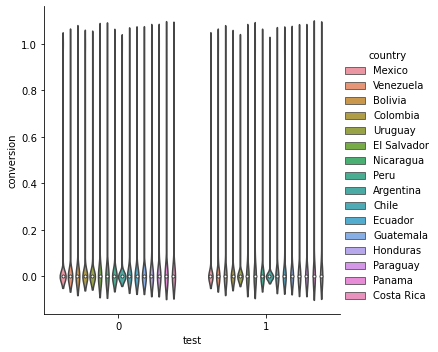

In [71]:
sns.catplot(data=df_ES_NonSpain, x="test", y="conversion", hue="country", kind="violin")

In [114]:
## conversion rate by country
#calculate_pvalue(df_ES_NonSpain)

for country in df_ES_NonSpain['country'].unique():
    print(country) 
    print("Total no", df_ES_NonSpain[df_ES_NonSpain['country']==country].shape[0], \
          "Treatment", df_ES_NonSpain[(df_ES_NonSpain['country']==country) & (df_ES_NonSpain['test']==1)].shape[0], \
         "Control", df_ES_NonSpain[(df_ES_NonSpain['country']==country) & (df_ES_NonSpain['test']==0)].shape[0])
    calculate_pvalue(df_ES_NonSpain[df_ES_NonSpain['country']==country])
    print("======")

Mexico
Total no 107086 Treatment 53536 Control 53550
n_treatment 53536 n_control 53550
p_delta in % 0.1 p_treatment in % 5.09 p_control in % 5.0
p-value 0.4703654929240487
CI in % -0.17 0.36
Venezuela
Total no 26733 Treatment 13245 Control 13488
n_treatment 13245 n_control 13488
p_delta in % -0.09 p_treatment in % 4.98 p_control in % 5.07
p-value 0.7415162376897758
CI in % -0.61 0.44
Bolivia
Total no 9254 Treatment 4654 Control 4600
n_treatment 4654 n_control 4600
p_delta in % -0.01 p_treatment in % 4.94 p_control in % 4.96
p-value 0.9742850025859586
CI in % -0.9 0.87
Colombia
Total no 44850 Treatment 22348 Control 22502
n_treatment 22348 n_control 22502
p_delta in % -0.19 p_treatment in % 5.1 p_control in % 5.29
p-value 0.371496700735535
CI in % -0.6 0.22
Uruguay
Total no 3454 Treatment 3098 Control 356
n_treatment 3098 n_control 356
p_delta in % 0.25 p_treatment in % 1.1 p_control in % 0.84
p-value 0.6239689998711373
CI in % -0.77 1.28
El Salvador
Total no 6775 Treatment 3355 Control

/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_14520/636246040.py:6: RuntimeWarning: invalid value encountered in double_scalars
  p_treatment = 1.0*df[df['test'] == 1]['conversion'].sum()/n_treatment
/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_14520/636246040.py:8: RuntimeWarning: invalid value encountered in double_scalars
  p_control = 1.0*df[df['test'] == 0]['conversion'].sum()/n_control


In [76]:
## conversion rate by date
#calculate_pvalue(df_ES_NonSpain)

for date in df_ES_NonSpain['date'].unique():
    total_no = df_ES_NonSpain[df_ES_NonSpain['date']==date].shape[0]
    if total_no != 0:
        tmt_no = df_ES_NonSpain[(df_ES_NonSpain['date']==date) & (df_ES_NonSpain['test']==1)].shape[0]
        ctl_no = df_ES_NonSpain[(df_ES_NonSpain['date']==date) & (df_ES_NonSpain['test']==0)].shape[0]
        tmt_ratio = round(tmt_no/total_no , 5)
        ctl_ratio = round(ctl_no/total_no , 5)
        print("date", date, "Total no", total_no, \
              "Treatment", tmt_ratio, \
             "Control", ctl_ratio)

date 2015-12-04 Total no 103927 Treatment 0.53811 Control 0.46189
date 2015-11-30 Total no 52518 Treatment 0.53785 Control 0.46215
date 2015-12-03 Total no 73377 Treatment 0.5374 Control 0.4626
date 2015-12-02 Total no 52116 Treatment 0.53573 Control 0.46427
date 2015-12-01 Total no 52463 Treatment 0.53847 Control 0.46153


In [79]:
for date in df_ES_NonSpain['date'].unique():
    print(date) 
    print("Total no", df_ES_NonSpain[df_ES_NonSpain['date']==date].shape[0], \
          "Treatment", df_ES_NonSpain[(df_ES_NonSpain['date']==date) & (df_ES_NonSpain['test']==1)].shape[0], \
         "Control", df_ES_NonSpain[(df_ES_NonSpain['date']==date) & (df_ES_NonSpain['test']==0)].shape[0])
    calculate_pvalue(df_ES_NonSpain[df_ES_NonSpain['date']==date])
    print("======")

2015-12-04
Total no 103927 Treatment 55924 Control 48003
n_treatment 55924 n_control 48003
p_delta in % -0.37 p_treatment in % 4.35 p_control in % 4.72
p-value 0.004369301969349105
CI in % -0.62 -0.12
2015-11-30
Total no 52518 Treatment 28247 Control 24271
n_treatment 28247 n_control 24271
p_delta in % -0.67 p_treatment in % 4.48 p_control in % 5.15
p-value 0.000345250309633645
CI in % -1.04 -0.3
2015-12-03
Total no 73377 Treatment 39433 Control 33944
n_treatment 39433 n_control 33944
p_delta in % -0.56 p_treatment in % 4.38 p_control in % 4.94
p-value 0.00031233794421484665
CI in % -0.87 -0.26
2015-12-02
Total no 52116 Treatment 27920 Control 24196
n_treatment 27920 n_control 24196
p_delta in % -0.46 p_treatment in % 4.43 p_control in % 4.89
p-value 0.012649942119666307
CI in % -0.83 -0.1
2015-12-01
Total no 52463 Treatment 28250 Control 24213
n_treatment 28250 n_control 24213
p_delta in % -0.61 p_treatment in % 4.13 p_control in % 4.74
p-value 0.0006830757902161034
CI in % -0.97 -0.2

In [113]:
df_ES_NonSpain.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1,M,31.0,Bolivia
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0,F,33.0,Mexico


In [117]:
for source in df_ES_NonSpain['source'].unique():
    print(source) 
    print("Total no", df_ES_NonSpain[df_ES_NonSpain['source']==source].shape[0], \
          "Treatment", df_ES_NonSpain[(df_ES_NonSpain['source']==source) & (df_ES_NonSpain['test']==1)].shape[0], \
         "Control", df_ES_NonSpain[(df_ES_NonSpain['source']==source) & (df_ES_NonSpain['test']==0)].shape[0])
    calculate_pvalue(df_ES_NonSpain[df_ES_NonSpain['source']==source])
    print("======")

Ads
Total no 134033 Treatment 71895 Control 62138
n_treatment 71895 n_control 62138
p_delta in % -0.57 p_treatment in % 4.35 p_control in % 4.92
p-value 7.124125185667552e-07
CI in % -0.8 -0.35
Direct
Total no 66903 Treatment 35906 Control 30997
n_treatment 35906 n_control 30997
p_delta in % -0.62 p_treatment in % 4.28 p_control in % 4.9
p-value 0.0001286642775010934
CI in % -0.94 -0.3
SEO
Total no 133465 Treatment 71973 Control 61492
n_treatment 71973 n_control 61492
p_delta in % -0.4 p_treatment in % 4.39 p_control in % 4.79
p-value 0.0005572093985742277
CI in % -0.62 -0.17


In [119]:
for device in df_ES_NonSpain['device'].unique():
    print(device) 
    print("Total no", df_ES_NonSpain[df_ES_NonSpain['device']==device].shape[0], \
          "Treatment", df_ES_NonSpain[(df_ES_NonSpain['device']==device) & (df_ES_NonSpain['test']==1)].shape[0], \
         "Control", df_ES_NonSpain[(df_ES_NonSpain['device']==device) & (df_ES_NonSpain['test']==0)].shape[0])
    calculate_pvalue(df_ES_NonSpain[df_ES_NonSpain['device']==device])
    print("======")

Web
Total no 185566 Treatment 99672 Control 85894
n_treatment 99672 n_control 85894
p_delta in % -0.47 p_treatment in % 4.32 p_control in % 4.79
p-value 1.1530875514722313e-06
CI in % -0.66 -0.28
Mobile
Total no 148835 Treatment 80102 Control 68733
n_treatment 80102 n_control 68733
p_delta in % -0.56 p_treatment in % 4.39 p_control in % 4.96
p-value 3.186535490685915e-07
CI in % -0.78 -0.35


In [121]:
for ads_channel in df_ES_NonSpain['ads_channel'].unique():
    print(ads_channel) 
    print("Total no", df_ES_NonSpain[df_ES_NonSpain['ads_channel']==ads_channel].shape[0], \
          "Treatment", df_ES_NonSpain[(df_ES_NonSpain['ads_channel']==ads_channel) & (df_ES_NonSpain['test']==1)].shape[0], \
         "Control", df_ES_NonSpain[(df_ES_NonSpain['ads_channel']==ads_channel) & (df_ES_NonSpain['test']==0)].shape[0])
    calculate_pvalue(df_ES_NonSpain[df_ES_NonSpain['ads_channel']==ads_channel])
    print("======")

Google
Total no 50106 Treatment 26841 Control 23265
n_treatment 26841 n_control 23265
p_delta in % -0.47 p_treatment in % 4.37 p_control in % 4.84
p-value 0.011741671247870386
CI in % -0.84 -0.11
nan
Total no 0 Treatment 0 Control 0
n_treatment 0 n_control 0
p_delta in % nan p_treatment in % nan p_control in % nan
p-value nan
CI in % nan nan
Facebook
Total no 50546 Treatment 27159 Control 23387
n_treatment 27159 n_control 23387
p_delta in % -0.75 p_treatment in % 4.39 p_control in % 5.14
p-value 8.868807825392157e-05
CI in % -1.12 -0.37
Bing
Total no 10018 Treatment 5389 Control 4629
n_treatment 5389 n_control 4629
p_delta in % -0.6 p_treatment in % 4.05 p_control in % 4.64
p-value 0.14334848376197742
CI in % -1.4 0.2
Yahoo
Total no 20318 Treatment 10890 Control 9428
n_treatment 10890 n_control 9428
p_delta in % -0.39 p_treatment in % 4.43 p_control in % 4.82
p-value 0.18799313675340262
CI in % -0.97 0.19
Other
Total no 3045 Treatment 1616 Control 1429
n_treatment 1616 n_control 1429
p

/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_14520/636246040.py:6: RuntimeWarning: invalid value encountered in double_scalars
  p_treatment = 1.0*df[df['test'] == 1]['conversion'].sum()/n_treatment
/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_14520/636246040.py:8: RuntimeWarning: invalid value encountered in double_scalars
  p_control = 1.0*df[df['test'] == 0]['conversion'].sum()/n_control


In [122]:
df_ES_NonSpain.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1,M,31.0,Bolivia
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0,F,33.0,Mexico


In [124]:
for sex in df_ES_NonSpain['sex'].unique():
    print(sex) 
    print("Total no", df_ES_NonSpain[df_ES_NonSpain['sex']==sex].shape[0], \
          "Treatment", df_ES_NonSpain[(df_ES_NonSpain['sex']==sex) & (df_ES_NonSpain['test']==1)].shape[0], \
         "Control", df_ES_NonSpain[(df_ES_NonSpain['sex']==sex) & (df_ES_NonSpain['test']==0)].shape[0])
    calculate_pvalue(df_ES_NonSpain[df_ES_NonSpain['sex']==sex])
    print("======")

M
Total no 194806 Treatment 104716 Control 90090
n_treatment 104716 n_control 90090
p_delta in % -0.48 p_treatment in % 4.37 p_control in % 4.85
p-value 5.439326540218511e-07
CI in % -0.67 -0.29
F
Total no 139208 Treatment 74882 Control 64326
n_treatment 74882 n_control 64326
p_delta in % -0.56 p_treatment in % 4.33 p_control in % 4.89
p-value 8.853970850457465e-07
CI in % -0.78 -0.33
nan
Total no 0 Treatment 0 Control 0
n_treatment 0 n_control 0
p_delta in % nan p_treatment in % nan p_control in % nan
p-value nan
CI in % nan nan


/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_14520/636246040.py:6: RuntimeWarning: invalid value encountered in double_scalars
  p_treatment = 1.0*df[df['test'] == 1]['conversion'].sum()/n_treatment
/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_14520/636246040.py:8: RuntimeWarning: invalid value encountered in double_scalars
  p_control = 1.0*df[df['test'] == 0]['conversion'].sum()/n_control


## Algorithm to automatically detect issue
### Sampling bias checking algorithm
### Result: Sampling_Balance = TRUE/FALSE, for either complete dataset, or segmentations


In [196]:
def check_assignment_imbalance(df):
    df1 = df[['user_id', 'test']].groupby(['test']).count().reset_index()
    # count the no. of users in treament vs control
    print(df1)
    pvalue = stats.binom_test(df1[df1['test']==1]['user_id'].values[0], 
    n = df1['user_id'].sum(), 
    p=0.5, 
    alternative='two-sided')
    print(pvalue, "type of pvalue: ", type(pvalue), pvalue<0.05)
    if pvalue < 0.05 or str(pvalue) == "0.0":
        return "FALSE"
    else:
        return "TRUE"

In [182]:
Overall_Balance = check_assignment_imbalance(df)

   test  user_id
0     0   237338
1     1   215983
7.799436729492344e-221


/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


In [183]:
print(Overall_Balance)

FALSE


In [184]:
def check_assignment_imbalance_by_segment(df, column_to_segment):
    segments = df[column_to_segment].unique()
    print("==================== ")
    print("Column to segment = ", column_to_segment)
    print("Available segments = ", segments)
    overall_inbalance = check_assignment_imbalance(df)
    print("*** OVERALL IMBALANCE :", overall_inbalance)
    print("==================== \n\n")
    
    
    
    for seg in segments:
        print(str(column_to_segment) + ":" + str(seg)) 
        total_count = df[df[column_to_segment]==seg].shape[0]
        if total_count != 0:
            trt_count = df_ES_NonSpain[(df[column_to_segment]==seg) & (df['test']==1)].shape[0]
            ctr_count = df_ES_NonSpain[(df[column_to_segment]==seg) & (df['test']==0)].shape[0]
            trt_ratio = round(trt_count/total_count, 5)
            ctr_ratio = round(ctr_count/total_count, 5)
            
            balance_or_not_based_on_pvalue = check_assignment_imbalance(df_ES_NonSpain[df[column_to_segment]==seg])
            print("****** segment", seg,  "segment_balance", balance_or_not_based_on_pvalue, \
                  "total_count", total_count, \
                  "treatment_ratio", trt_ratio, \
                  "control_ratio", ctr_ratio, "\n")
            if balance_or_not_based_on_pvalue and balance_or_not_based_on_pvalue == "FALSE":
                return "FALSE"
    return "TRUE"

In [199]:
Segmentwise_Sampling_Balance = check_assignment_imbalance_by_segment(df_ES_NonSpain, 'country')

Column to segment =  country
Available segments =  ['Mexico' 'Venezuela' 'Bolivia' 'Colombia' 'Uruguay' 'El Salvador'
 'Nicaragua' 'Peru' 'Argentina' 'Chile' 'Ecuador' 'Guatemala' 'Honduras'
 'Paraguay' 'Panama' 'Costa Rica' nan]
   test  user_id
0     0   154627
1     1   179774
2.5e-323 type of pvalue:  <class 'numpy.float64'> True
*** OVERALL IMBALANCE : FALSE


country:Mexico
   test  user_id
0     0    53550
1     1    53536
0.9683114396989508 type of pvalue:  <class 'numpy.float64'> False
****** segment Mexico segment_balance TRUE total_count 107086 treatment_ratio 0.49993 control_ratio 0.50007 

country:Venezuela
   test  user_id
0     0    13488
1     1    13245
0.13884467906884249 type of pvalue:  <class 'numpy.float64'> False
****** segment Venezuela segment_balance TRUE total_count 26733 treatment_ratio 0.49546 control_ratio 0.50454 

country:Bolivia
   test  user_id
0     0     4600
1     1     4654


/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)
/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)
/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)
/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.5816712463721089 type of pvalue:  <class 'numpy.float64'> False
****** segment Bolivia segment_balance TRUE total_count 9254 treatment_ratio 0.50292 control_ratio 0.49708 

country:Colombia
   test  user_id
0     0    22502
1     1    22348
0.4700157842375056 type of pvalue:  <class 'numpy.float64'> False
****** segment Colombia segment_balance TRUE total_count 44850 treatment_ratio 0.49828 control_ratio 0.50172 

country:Uruguay
   test  user_id
0     0      356
1     1     3098
0.0 type of pvalue:  <class 'numpy.float64'> True
****** segment Uruguay segment_balance FALSE total_count 3454 treatment_ratio 0.89693 control_ratio 0.10307 



/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)
/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


In [171]:
print("Overall_Sampling_Balance", Overall_Balance)
print("Segmentwise_Sampling_Balance", Segmentwise_Sampling_Balance)

Overall_Sampling_Balance FALSE
Segmentwise_Sampling_Balance FALSE


In [197]:
Uruguay = df_ES_NonSpain[df_ES_NonSpain['country']=='Uruguay']

In [198]:
check_assignment_imbalance(Uruguay)

   test  user_id
0     0      356
1     1     3098
0.0 type of pvalue:  <class 'numpy.float64'> True


/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


'FALSE'

## Conclusions
### 1. The A/B test result indeed give a negative result for ES browser_language countries excluding Spain. 
#### Delta is -0.51% with p-value 1.991e-12 and 95% CI -0.66 -0.37
### 2. The result might be happening due to sampling bias in the A/B testing experiment design.
#### When I inspect the % of control vs % of treatment in each LatAm country, Uruguay has 90% in treatment while 10% in control. Argentina has 80% in treatment and 20% in control
#### I also inspected the A/B testing result country by country, none of the countries had significant p-value in t-test. That means for each version of the translation we do not see a negative reesult compared to old version
#### With the above information, the localized translation is not really worse, at least we do not have enough information to conclude. 
### 3. There is some flaw with sampling, I make a assumption of binomial distribution to check assignment bias. P-value 7.8e-221 showed significant bias
#### I then designed an algorithm to retur FALSE if overall sample assignment is biased or for specific segment based on a column (eg. country), any one segment contains bias 